## API Test - Generate SVG with OpenAI API

In [3]:
from openai import OpenAI
from IPython.display import SVG, display


In [7]:
client = OpenAI()

response = client.responses.create(
    model="gpt-5.2",
    input="""
    create an svg of a smiley face.
    Make the SVG only with black lines with no background color.
    """
)

print(response.output_text)

```svg
<svg xmlns="http://www.w3.org/2000/svg" width="200" height="200" viewBox="0 0 200 200">
  <!-- Face outline -->
  <circle cx="100" cy="100" r="85" fill="none" stroke="#000" stroke-width="6"/>

  <!-- Eyes -->
  <circle cx="70" cy="80" r="10" fill="none" stroke="#000" stroke-width="6"/>
  <circle cx="130" cy="80" r="10" fill="none" stroke="#000" stroke-width="6"/>

  <!-- Smile -->
  <path d="M 60 120 Q 100 160 140 120" fill="none" stroke="#000" stroke-width="6" stroke-linecap="round"/>
</svg>
```


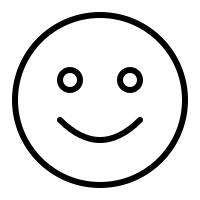

In [8]:
# Display the generated SVG
text = response.output_text
# Extract SVG from markdown code block if present
if "```" in text and "<svg" in text.lower():
    import re
    match = re.search(r"```(?:svg|xml)?\s*([\s\S]*?)```", text, re.IGNORECASE)
    if match:
        text = match.group(1).strip()
if "<svg" in text.lower() and "</svg>" in text.lower():
    display(SVG(text))
else:
    print("Response (no valid SVG found):")
    print(text)